In [1]:
%matplotlib inline
#Standard libraries;
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import scipy 
from scipy import signal 
from collections import OrderedDict

#This one is different for python 3 i think
from scipy.signal import kaiserord, lfilter, firwin, freqz

#packages to make lists of file locations
import os
from glob import glob

#Import your custom packages
import sys
#path to location where you have your pyhton packages like matplotlib
#I createda file in that directory titled my_pkgs where I place custom packages
sys.path.append('/Users/**/anaconda/pkgs/')
from my_pkgs import f_content

In [2]:
#Discrete fourier transform as numpy fft. Includes both real and imaginary parts
def DFT(signal,fs,n):
    frequency_content = np.abs(scipy.fft(signal))
    df = fs/(n-1)
    #frequency vector
    fv = np.arange(0,fs/2.,df)
    return fv, frequency_content

In [63]:
#Path to directory with acoustic data
path = '/Users/**/Test_dir/'

#Generate list of files from the data directory and sort. 
files = glob(os.path.join(path,'*test*.txt'))
files.sort()
files

In [42]:
#Create list of data file names without the extensions
filenames=[]
for i in range(0,len(files)):
    x = files[i].split('/')
    y = x[len(x)-1].split('.')
    filenames.append(y[0])

In [43]:
#import one file and get length of waveform; create array to store waveofrm data
x = np.loadtxt(files[0])
waveform_array = np.zeros([x.size,len(files)])

#load waveform data into master array
for filenum,filepath in enumerate(files):
    waveform_array[:,filenum]=np.loadtxt(filepath)

In [52]:
#Lists a few key variables like sampling frequency
fs = 50e6              #hZ
#number of waveforms
Samples = len(files)
#stopping point for the fft
max_index = 6000
#Create time and frequency vectors
time = (np.linspace(0,x.size-1,num=x.size))*0.02
freq_vector = DFT(waveform_array[0:max_index,0],fs,max_index)[0]

#stresses where measurements were taken
stress = [24,30,68]

frequency_content = np.zeros([max_index,Samples])
for i in range(0,Samples):
    frequency_content[:,i] = DFT(waveform_array[0:max_index,i],fs,max_index)[1]/np.max(DFT(waveform_array[0:max_index,i],fs,max_index)[1])

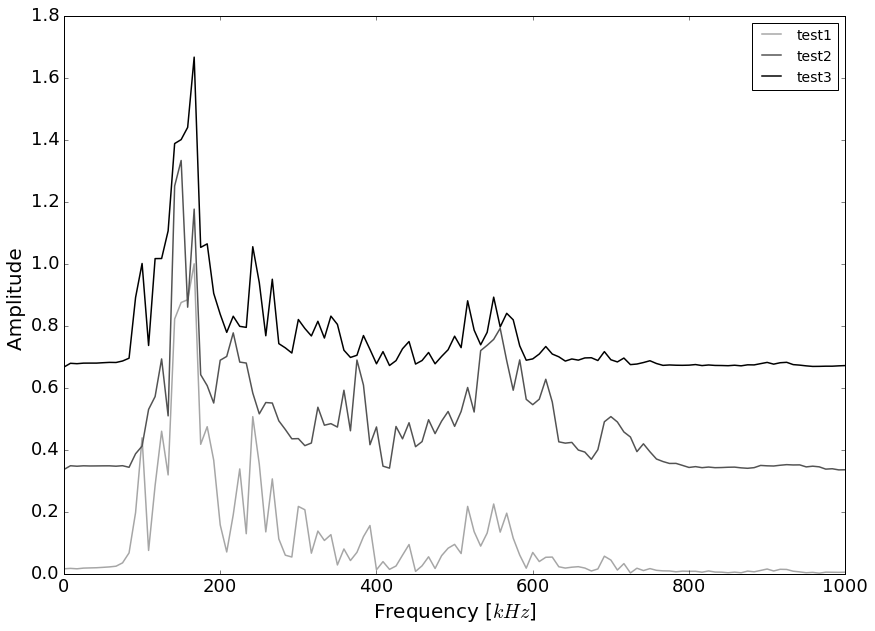

In [53]:
#variable 'a' creates separation between individual spctra in plot below...purely for visualizing difference in spectra
a = np.linspace(0,2,Samples)
color = np.linspace(0.65,0,Samples)

#plot frequency content
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1,1,1)
for i in range(0,Samples):
    ax.plot(freq_vector/1e3,frequency_content[0:freq_vector.size,i]+i/3., label = '%s' %filenames[i],linewidth=1.5,c='%f' %color[i])
ax.set_ylabel('Amplitude ',fontsize = 20)
ax.set_xlabel('Frequency [$kHz$]',fontsize = 20)
ax.set_xlim([0,1e3])
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='upper right', fontsize = 14)

In [54]:
#Use custom package f_content.py to create visual representation of the spectrogram
#First, create instance of the f_content module
plotf = f_content.fc()
#Second, load variables to plot later
plotf.loadvar(max_index,stress,waveform_array,time,frequency_content,freq_vector,fs)

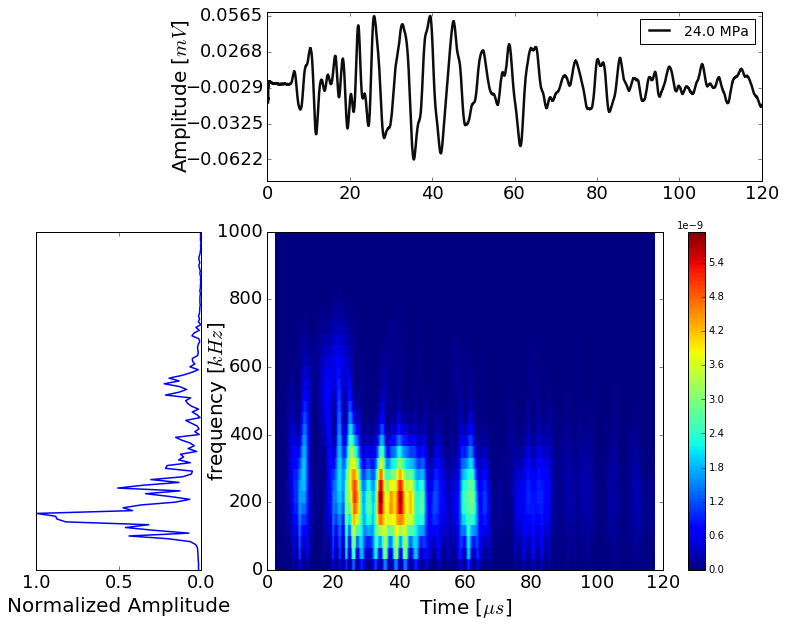

In [55]:
#n is the waveform you want to plot, and the index for the waveform_array[:,n]
f,t,Sxx=plotf.plotfigure(n=0)
f_amp,t_amp,Sxx_amp=plotf.findamp(f,t,Sxx,tmin=20,tmax=30)

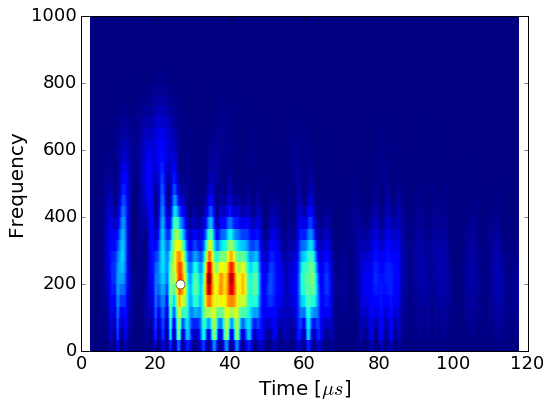

In [62]:
#Plot spectrogram with location of highest amplitude
plt.figure(figsize=(8,6))
im=plt.pcolormesh(t*1e6, f/1e3, Sxx)
fig.colorbar(im)
plt.ylim([0,1e3])
plt.xlim([0,120]);
plt.plot(t_amp,f_amp,'o',c='w',markersize=9)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Time [$\mu s$]',fontsize = 20)
plt.ylabel('Frequency',fontsize=20)